In [53]:
#Basic Lib
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sb
sb.set()

from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.api import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [54]:
train = pd.read_csv("../Data/AAPLTrain.csv",parse_dates=['Date'],index_col=['Date'])
test = pd.read_csv("../Data/AAPLTest.csv",parse_dates=['Date'],index_col=['Date'])

In [55]:
train = train.loc[lambda x : x.index > dt.datetime(2012,12,31)]
df = pd.concat([train,test])

# Time Series Decomposition

Here can be seen where the decomposition of time series into the basis three: Trend, Seasonality and Residual


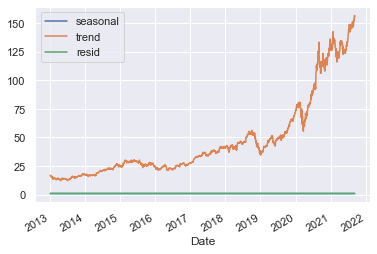

In [61]:
result = seasonal_decompose(train['Adj Close'],model='multiplicative',period=1)
result.seasonal.plot()
result.trend.plot()
result.resid.plot()
plt.legend(loc='best')

# Stock Market Analysis

To get the rough gauge of the movement of the stock market (up or down), the calculation of **moving average** is used.

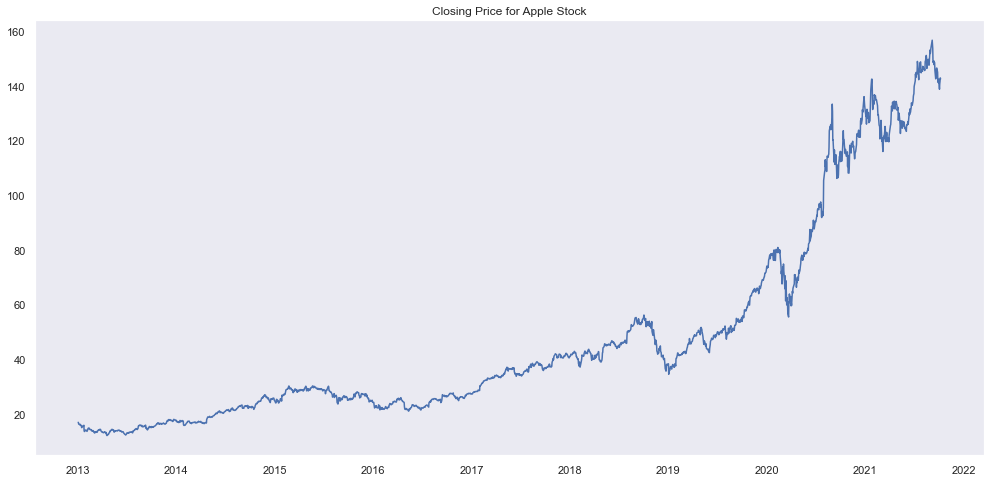

In [54]:
plt.figure(figsize=(17,8))
plt.plot(df.index,df['Adj Close'])
plt.title("Closing Price for Apple Stock")
plt.grid(False)
plt.show()

In [50]:
def plot_moving_average(series,window,plot_intervals=False,scale=1.96):
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(17,8))
    plt.title('Moving Average \n Window size = {}'.format(window))
    plt.plot(rolling_mean,'g',label="Rolling Mean trend")

    if plot_intervals:
        mae = mean_absolute_error(series[window:],rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--',label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

        plt.plot(series[window:],label='Actual values')
        plt.legend(loc='best')
        plt.grid(True)

# Simple Moving Average

Moving average is to help smooth out the price data by creating a constantly updated average price, removing any random short-term fluctuation (**seasonality**) on the price

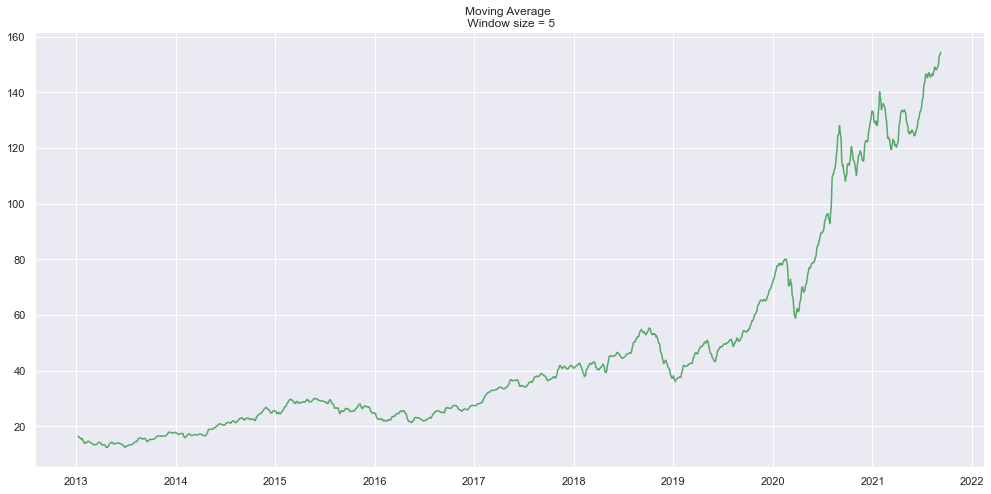

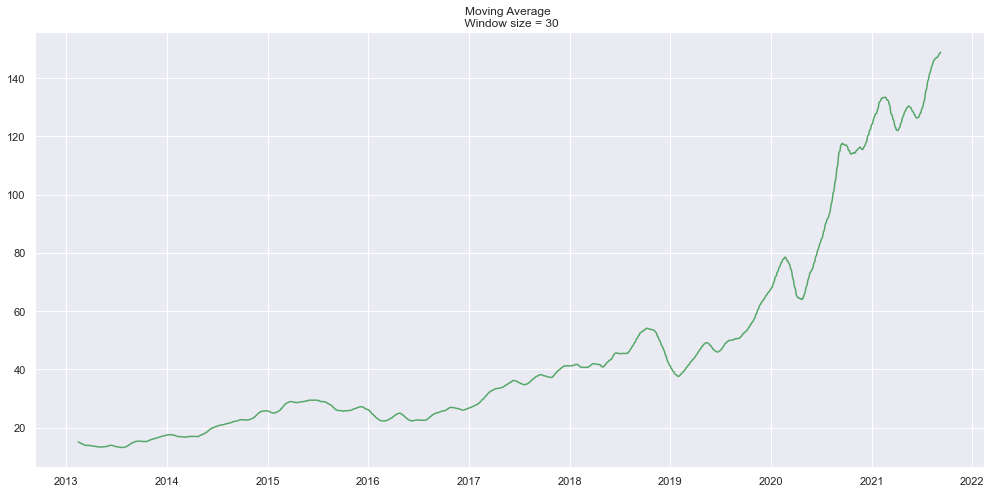

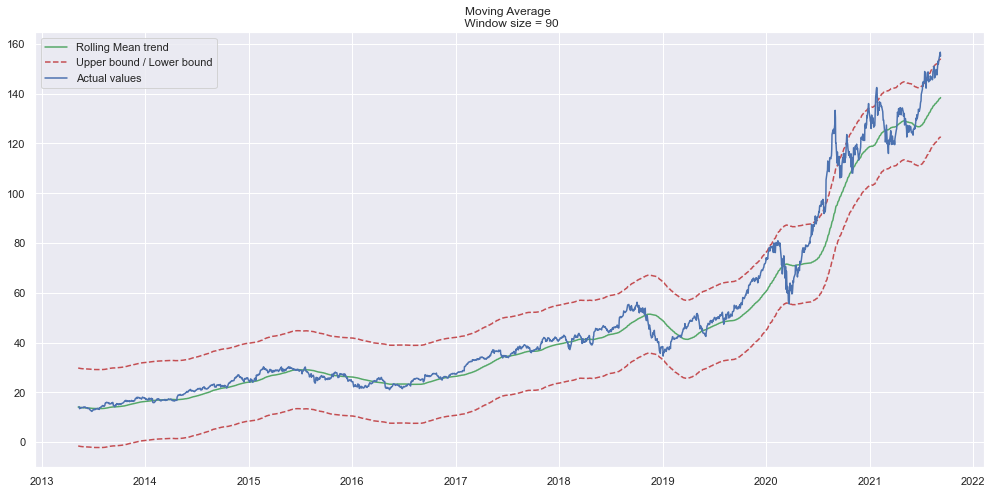

In [51]:
plot_moving_average(train['Adj Close'],5)

plot_moving_average(train['Adj Close'],30)

plot_moving_average(train['Adj Close'],90,plot_intervals=True)

By comparing three variation of the moving average, a trend (**lagging**) is can be seen within the graph of 30-days and 90-days.

# Disadvantages of Simple Moving Average

A naive approach that states the next observation is the mean of all past observation.
* Often overlooks complex relationships mentioned in the data
* Does not respond to fluctuation that take place for a reason. i.e.: Cycles and seasonal impacts

# Exponential Moving Average

Similar to a simple moving average, Exponential Moving Average put more emphasis on recent data points by assigning different decreasing weight to each observation.
With EMA responds quicker to changing prices, it is able to capture the fluctuation and the trend faster.

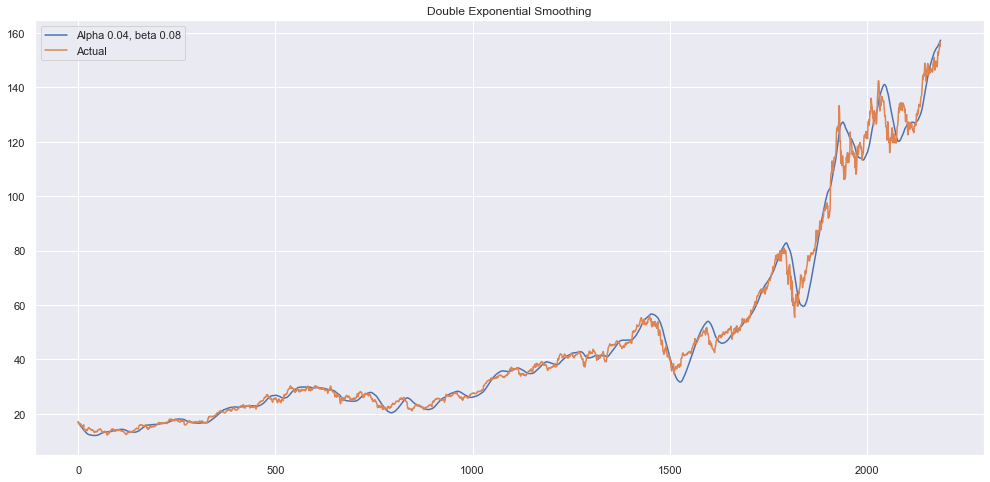

In [52]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):

    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(train['Adj Close'], alphas=[0.04], betas=[0.08])

# Disadvantages of Exponential Moving Average

Due to the greater sensitivity of EMA, it is easier for false positive to show the movement of the graph, identifying wrong areas of support or resistance

# Finding the Right Model

In order for the prediction of price movement based on the history, it requires few conditions:
 * strength of one dependent variable with predictor
 * model time series exhibiting non-stationary properties and seasonality

Therefore, Autoregressive Integrated Moving Average (ARIMA) is used to model the time series.

For further explanation [click on this.](../Analysis/ARIMA-GARCH/ARIMAGARCHPrediction.ipynb)